In [16]:
%load_ext autoreload
%autoreload 2

In [17]:
import brushGauss #Work out capitalisation
import numpy as np
from lmfit import Parameters, printfuncs
from refnx.analysis import Transform, CurveFitter
from refnx.dataset import ReflectDataset
%matplotlib inline
import matplotlib.pyplot as plt

In [18]:
# load the dataset
# d = ReflectDataset('filename')

In [19]:
t = Transform('logY').transform

In [20]:
# Transform the data to log R
# d.y, d.y_err = t(d.x, d.y, d.y_err)

In [21]:
a = brushGauss.BrushGauss(1, 3, n_slices=200, dq = 10.01, transform=t)

In [22]:
a.parameter_names()

['scale',
 'bkg',
 'SLD_super',
 'SLD_sub',
 'thickness_SiO2',
 'SLD_SiO2',
 'roughness_SiO2',
 'SLD_poly',
 'adsorbed_amount',
 'roughness_backing',
 'phi_init',
 'tail_thickness',
 'roughness_tail2int',
 'thickness_1',
 'phi_1',
 'roughness_1',
 'thickness_2',
 'phi_2',
 'roughness_2',
 'thickness_3',
 'phi_3',
 'roughness_3']

In [23]:
vals = [1, 1e-6, 2.07, 6.36, 25, 3.47, 5, 1, 1, 3, 0.3, 200, 3, 20, 0.5, 3, 20, 0.5, 3, 20, 0.5, 3]
# lbs = []
# ubs = []

In [24]:
P = Parameters()

In [25]:
for name, val in zip(a.parameter_names(), vals):
    P.add(name, val, True)

In [26]:
slab_pars = a.to_slab(P)

In [27]:
assert(slab_pars[0] * 4 + 8 == np.size(slab_pars))

In [28]:
dir(a)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'adsorbed_amount',
 'callback',
 'dq',
 'model',
 'n_interior',
 'n_slices',
 'parallel',
 'parameter_names',
 'params_test',
 'quad_order',
 'set_dq',
 'sld_poly',
 'sld_profile',
 'to_slab',
 'transform',
 'vol_cut',
 'vol_fraction']

In [29]:
z, rho = a.sld_profile(P)
z2, rho2 = a.vol_fraction(P)



500


In [30]:
P['roughness_1']

<Parameter 'roughness_1', 3, bounds=[-inf:inf]>

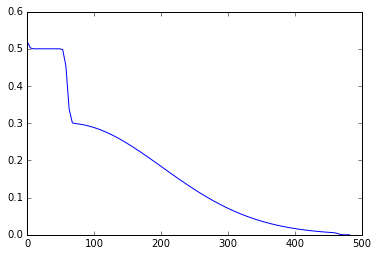

In [38]:
plt.plot(z2,rho2)

In [32]:
q = np.linspace(0.01, 0.3, 1000)
ref = a.model(q, P)

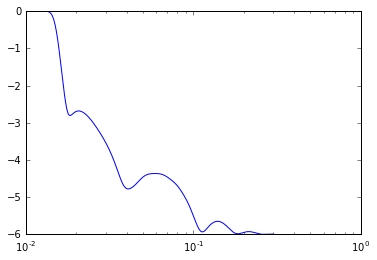

In [33]:
plt.plot(q, ref)
plt.xscale('log')

In [34]:
b = CurveFitter(a, (q, ref), P)
# you can give CurveFitter a dataset
# b = CurveFitter(a, d, P)

In [35]:
c = b.fit()

In [36]:
print(printfuncs.fit_report(c))

[[Fit Statistics]]
    # function evals   = 25
    # data points      = 1000
    # variables        = 22
    chi-square         = 0.000
    reduced chi-square = 0.000
    Akaike info crit   = -inf
    Bayesian info crit = -inf
[[Variables]]
    scale:                1          +/- 0        (0.00%) (init= 1)
    bkg:                  1.0000e-06 +/- 0        (0.00%) (init= 1e-06)
    SLD_super:            2.07000000 +/- 0        (0.00%) (init= 2.07)
    SLD_sub:              6.36000000 +/- 0        (0.00%) (init= 6.36)
    thickness_SiO2:       25         +/- 0        (0.00%) (init= 25)
    SLD_SiO2:             3.47000000 +/- 0        (0.00%) (init= 3.47)
    roughness_SiO2:       5          +/- 0        (0.00%) (init= 5)
    SLD_poly:             1          +/- 0        (0.00%) (init= 1)
    adsorbed_amount:      1          +/- 0        (0.00%) (init= 1)
    roughness_backing:    3          +/- 0        (0.00%) (init= 3)
    phi_init:             0.30000000 +/- 0        (0.00%) (init= 

In [37]:
b.emcee

<bound method CurveFitter.emcee of <refnx.analysis.curvefitter.CurveFitter object at 0x000000000ABC6898>>